## TP1 ATDN 2

### Nassim Benchikh GRP3

### Analyse de Données et Méthodes d'Ensemble

#### Les objectifs pédagogiques de ce TP sont les suivants :

- Maîtriser les bases de l'analyse exploratoire des données (statistiques descriptives, détection des outliers, tests statistiques)
- Comprendre les méthodes de réduction de dimensionnalité (ACP, ACP à noyau)
- Implémenter des méthodes d'ensemble (Bagging, Boosting)
- Appliquer ces techniques sur des données réelles issues d'un élevage de poulets
- Comparer les performances des différentes approches

### Partie 1 : Analyse exploratoire des données

In [2]:
import numpy as np
import pandas as pd

df = pd.DataFrame({
'poids': np.random.normal(2.5, 0.5, 100),
'nourriture': np.random.normal(1.2, 0.3, 100),
'temperature': np.random.normal(25, 2, 100)
})

df.head()
df.to_csv('donnees.csv', index=False)

### Exercice 1 : Statistiques descriptives (1 points)

1.  Calculez la moyenne, médiane, écart-type, variance et les quartiles pour les variables poids, nourriture et température.

2.  Tracez des histogrammes et des boxplots pour visualiser la répartition des données. Que pouvez-vous déduire de ces graphiques ? Les données semblent-elles homogènes ou dispersées ?

In [6]:
# 1 Calculer la moyenne, mediane, variance, quartiles et l'écart-type pour les variables poids, nourriture et température.

# Moyenne : 

moyenne_poids = df['poids'].mean()
moyenne_nourriture = df['nourriture'].mean()
moyenne_temperature = df['temperature'].mean()
print(f"Moyenne Poids: {moyenne_poids}")
print(f"Moyenne Nourriture: {moyenne_nourriture}")
print(f"Moyenne Temperature: {moyenne_temperature}")

# Mediane :

mediane_poids = df['poids'].median()
mediane_nourriture = df['nourriture'].median()
mediane_temperature = df['temperature'].median()
print(f"Mediane Poids: {mediane_poids}")
print(f"Mediane Nourriture: {mediane_nourriture}")
print(f"Mediane Temperature: {mediane_temperature}")



Moyenne Poids: 2.5260375977350438
Moyenne Nourriture: 1.1786997005785573
Moyenne Temperature: 25.048857694514787
Mediane Poids: 2.464168064501944
Mediane Nourriture: 1.2086796011651195
Mediane Temperature: 25.06285596747974


In [5]:
df.describe()

,poids,nourriture,temperature
count,100.000000,100.000000,100.000000
mean,2.526038,1.178700,25.048858
std,0.478445,0.308816,1.631165
min,1.476550,0.118146,21.797447
25%,2.152372,0.962581,23.900916
50%,2.464168,1.208680,25.062856
75%,2.931523,1.382910,26.072885
max,3.564545,1.848101,29.194661


### Moyennes : 

- Moyenne Poids: 2.5260375977350438
- Moyenne Nourriture: 1.1786997005785573
- Moyenne Temperature: 25.048857694514787

### Medianes : 
- Mediane Poids: 2.464168064501944
- Mediane Nourriture: 1.2086796011651195
- Mediane Temperature: 25.06285596747974

### Quantiles : 

- Quartiles Poids: 
25% :   2.152372
50% :    2.464168
75%  :   2.931523

- Quartiles Nourriture:
25%  :  0.962581
50% :  1.208680
75% :   1.382910


- Quartiles Temperature: 
25%  :   23.900916
50%  :   25.062856
75%  :  26.072885

### Ecart-Type : 

- Ecart-type Poids: 0.4784451452003922
- Ecart-type Nourriture: 0.3088159432398516
- Ecart-type Temperature: 1.6311653562275668

In [8]:
# Variance :

variance_poids = df['poids'].var()
variance_nourriture = df['nourriture'].var()
variance_temperature = df['temperature'].var()
print(f"Variance Poids: {variance_poids}")
print(f"Variance Nourriture: {variance_nourriture}")
print(f"Variance Temperature: {variance_temperature}")

Variance Poids: 0.2289097569658244
Variance Nourriture: 0.09536728679911927
Variance Temperature: 2.6607004193570045


### Variances : 
- Variance Poids: 0.2289097569658244
- Variance Nourriture: 0.09536728679911927
- Variance Temperature: 2.6607004193570045

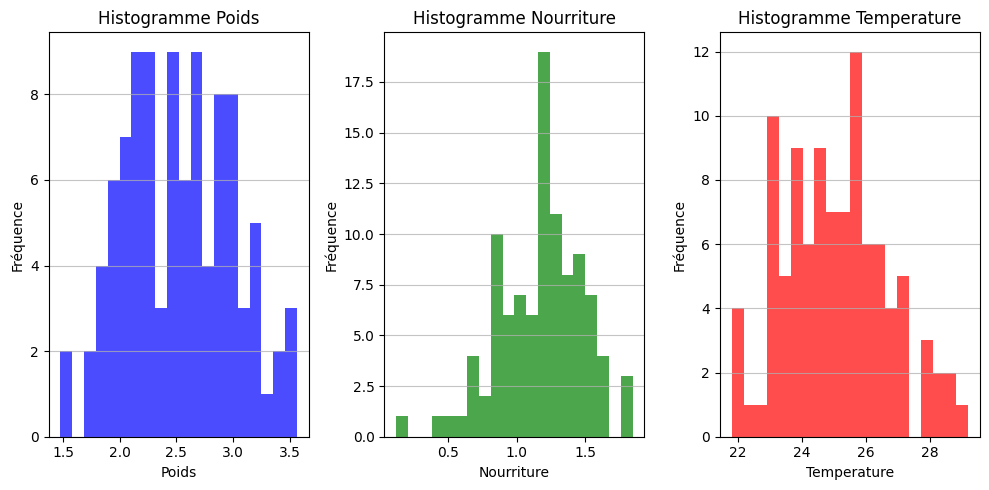

In [9]:
# Tracez des histogrammes et des boxplots pour visualiser la répartition des données. 

# Histogrammes :
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime 
import matplotlib.dates as mdates

# Histogramme Poids
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.hist(df['poids'], bins=20, color='blue', alpha=0.7)
plt.title('Histogramme Poids')
plt.xlabel('Poids')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.subplot(1, 3, 2)
plt.hist(df['nourriture'], bins=20, color='green', alpha=0.7)
plt.title('Histogramme Nourriture')
plt.xlabel('Nourriture')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.subplot(1, 3, 3)
plt.hist(df['temperature'], bins=20, color='red', alpha=0.7)
plt.title('Histogramme Temperature')
plt.xlabel('Temperature')   
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


### Observations : 

#### Poids :

- La distribution est légèrement asymétrique à droite, avec une majorité de valeurs autour de 2.5.

#### nourriture :
- La distribution est relativement symétrique, avec une majorité de valeurs autour de 1.2.

#### temperature :
- La distribution est légèrement asymétrique à droite, avec une majorité de valeurs autour de 25.



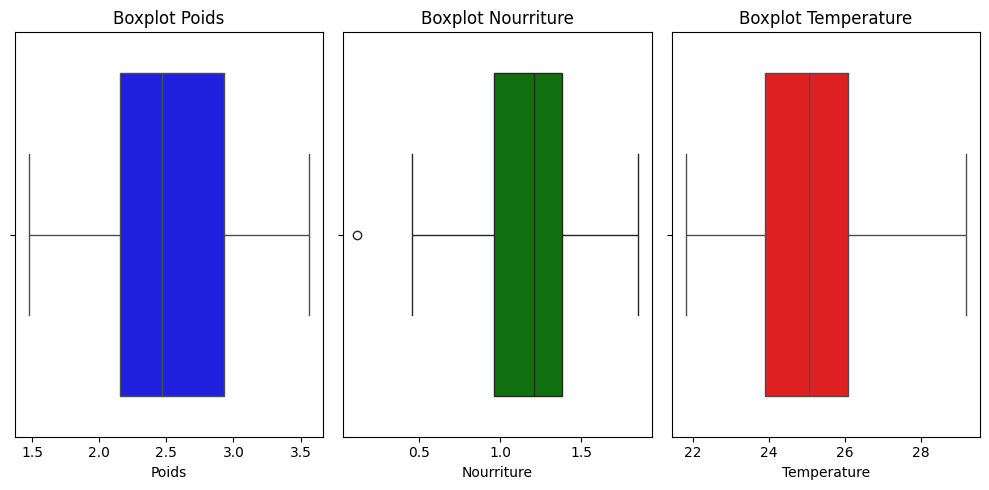

In [10]:
# Boxplots :

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['poids'], color='blue')
plt.title('Boxplot Poids')
plt.xlabel('Poids')
plt.subplot(1, 3, 2)
sns.boxplot(x=df['nourriture'], color='green')
plt.title('Boxplot Nourriture')
plt.xlabel('Nourriture')
plt.subplot(1, 3, 3)
sns.boxplot(x=df['temperature'], color='red')
plt.title('Boxplot Temperature')
plt.xlabel('Temperature')
plt.tight_layout()
plt.show()

#### Poids

- La boîte est large, ce qui indique une dispersion modérée des poids données.
- Pas d'outlier visible, donc pas de valeur extrême inhabituelle.

#### Nourriture

- La boîte est moins large, ce qui signifie une dispersion plus faible par rapport aux autres variables. 
- Un outlier est visible sur la gauche, ce qui montre une valeur atypique.


#### Tempertature

- La boîte est relativement grande, suggérant une dispersion notable.
- Les moustaches sont longues, ce qui signifie que les températures varient sur une large plage.
- Pas d'outlier visible.

#### Conclusion 

- Le poids et la température sont modérément dispersés car leurs boxplots sont larges avec de longues moustaches.
- La nourriture est la moins dispersée, sauf pour un outlier qui pourrait influencer l'analyse.
- Les données sur la nourriture sont les plus homogènes, car elles sont moins dispersées malgré un outlier.
- Les poids sont moyennement homogènes.
- Les températures sont les moins homogènes, car elles varient fortement.

### Exercice 2 : Détection des outliers

3.  Détectez les outliers avec la méthode de l'écart interquartile (IQR) et la méthode du Z-Score. Comparez les résultats.
4. Visualisez ces outliers sur un boxplot annoté. Les outliers détectés sont-ils réalistes ou issus d'erreurs de mesure ? Faut-il les exclure ou les garder ? Justifiez votre choix.

In [21]:
# Détectez les outliers avec la méthode de l'écart interquartile (IQR) et la méthode du Z-Score.
# Méthode de l'écart interquartile (IQR) pour poids

print("Détection des outliers avec la méthode de l'écart interquartile (IQR) et la méthode du Z-Score")
q1 = df['poids'].quantile(0.25)
q2 = df['poids'].quantile(0.75)
iqr = q2 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q2 + 1.5 * iqr
outliers_iqr = df[(df['poids'] < lower_bound) | (df['poids'] > upper_bound)]
print("Outliers Poids (IQR):")
print(outliers_iqr)


# Méthode du Z-Score pour poids
from scipy import stats
z_scores = np.abs(stats.zscore(df['poids']))
outliers_z = df[z_scores > 3]
print("Outliers Poids (Z-Score):")
print(outliers_z)

print("\nDétection des outliers par IQR et Z-Score pour nourriture:")

# Méthode de l'écart interquartile (IQR) pour nourriture
q1 = df['nourriture'].quantile(0.25)
q2 = df['nourriture'].quantile(0.75)
iqr = q2 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q2 + 1.5 * iqr
outliers_iqr = df[(df['nourriture'] < lower_bound) | (df['nourriture'] > upper_bound)]
print("Outliers Nourriture (IQR):")
print(outliers_iqr)

# Méthode du Z-Score pour nourriture
z_scores = np.abs(stats.zscore(df['nourriture']))
outliers_z = df[z_scores > 3]
print("Outliers Nourriture (Z-Score):")
print(outliers_z)


print("\nDétection des outliers par IQR et Z-Score pour temperature:")

# Méthode de l'écart interquartile (IQR) pour temperature
q1 = df['temperature'].quantile(0.25)
q2 = df['temperature'].quantile(0.75)
iqr = q2 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q2 + 1.5 * iqr
outliers_iqr = df[(df['temperature'] < lower_bound) | (df['temperature'] > upper_bound)]
print("Outliers Temperature (IQR):")    
print(outliers_iqr)

# Méthode du Z-Score pour temperature
z_scores = np.abs(stats.zscore(df['temperature']))
outliers_z = df[z_scores > 3]
print("Outliers Temperature (Z-Score):")
print(outliers_z)



Détection des outliers avec la méthode de l'écart interquartile (IQR) et la méthode du Z-Score
Outliers Poids (IQR):
Empty DataFrame
Columns: [poids, nourriture, temperature]
Index: []
Outliers Poids (Z-Score):
Empty DataFrame
Columns: [poids, nourriture, temperature]
Index: []

Détection des outliers par IQR et Z-Score pour nourriture:
Outliers Nourriture (IQR):
       poids  nourriture  temperature
32  3.549685    0.118146    25.621862
Outliers Nourriture (Z-Score):
       poids  nourriture  temperature
32  3.549685    0.118146    25.621862

Détection des outliers par IQR et Z-Score pour temperature:
Outliers Temperature (IQR):
Empty DataFrame
Columns: [poids, nourriture, temperature]
Index: []
Outliers Temperature (Z-Score):
Empty DataFrame
Columns: [poids, nourriture, temperature]
Index: []


##### Resultat : 
- Il n'y a pas d'outliers dans les variables **poids** et **temperature** selon la méthode Z-Score et la méthode IQR.
- Un outlier a été deteté pour la variable **nourriture** avec les 2 methodes

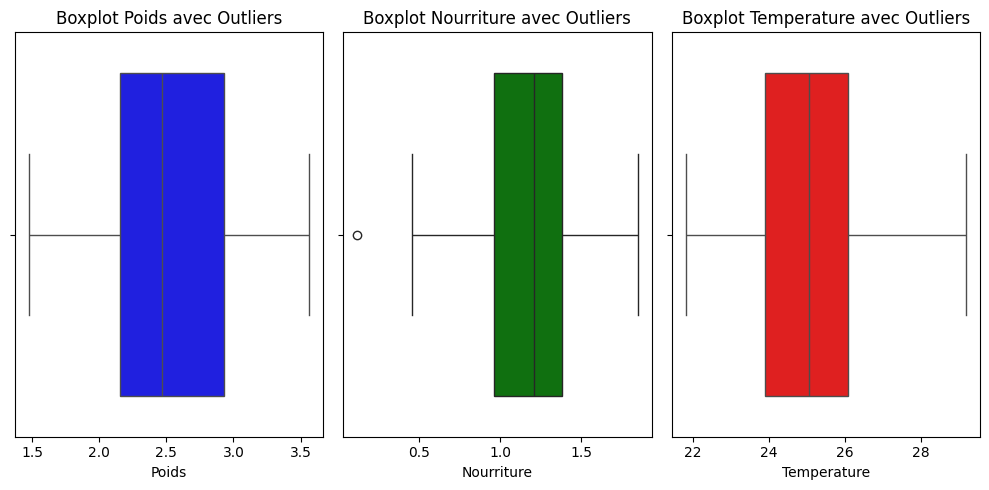

In [27]:
# Visualisez les outliers sur un boxplot annoté 

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['poids'], color='blue')
plt.title('Boxplot Poids avec Outliers')
plt.xlabel('Poids')
plt.subplot(1, 3, 2)
sns.boxplot(x=df['nourriture'], color='green')
plt.title('Boxplot Nourriture avec Outliers')
plt.xlabel('Nourriture')
plt.subplot(1, 3, 3)
sns.boxplot(x=df['temperature'], color='red')
plt.title('Boxplot Temperature avec Outliers')
plt.xlabel('Temperature')
plt.tight_layout()
plt.show()

#### Les outliers détectés sont-ils réalistes ou issus d'erreurs de mesure ? 

- Dans notre cas, on a detecté un outlier pour nourriture, et il est possible qu'il soit dû à une erreur de mesure ou à un individu ayant un comportement alimentaire exceptionnel.


#### Les outliers detectes, Faut-il les exclure ou les garder : 

- Il n'y a pas de réponse unique à cette question. Cela dépend du contexte de l'analyse et de la nature des données. Voici quelques considérations :
1. **Contexte de l'analyse** : Si les outliers sont le résultat d'erreurs de mesure ou de saisie, il peut être judicieux de les exclure. En revanche, si les outliers représentent des observations valides mais rares, il peut être pertinent de les conserver.
2. **Impact sur les résultats** : Les outliers peuvent influencer les résultats de l'analyse, en particulier dans les modèles statistiques. Il est important d'évaluer comment leur présence ou leur absence affecte les conclusions.

Donc, il est recommandé de documenter la décision prise concernant les outliers et de justifier cette décision en fonction du contexte de l'analyse.


### Exercice 3 : Tests paramétriques

5. Testez la normalité des variables (poids, nourriture, température) avec le test de Shapiro- Wilk. Expliquez ce que vous observez.
6.  Comparez les moyennes de deux groupes avec le test t de Student, puis utilisez une ANOVA pour comparer les moyennes de plusieurs groupes. Interprétez les résultats.

In [30]:
# Testez la normalité des variables (poids, nourriture, température) avec le test de Shapiro- Wilk. Expliquez ce que vous observez.

from scipy.stats import shapiro
stat, p = shapiro(df['poids'])
print('Statistique de Shapiro-Wilk pour Poids:', stat)
print('p-value pour Poids:', p)
alpha = 0.05 # 0.05 est le niveau de signification car c'est le plus utilisé, dans la documentation de scipy, il est conseillé de ne pas dépasser 0.05
if p > alpha:
    print('La distribution de Poids est normale (H0 acceptée)')
else:
    print('La distribution de Poids n\'est pas normale (H0 rejetée)')
stat, p = shapiro(df['nourriture'])
print('Statistique de Shapiro-Wilk pour Nourriture:', stat)
print('p-value pour Nourriture:', p)
if p > alpha:
    print('La distribution de Nourriture est normale (H0 acceptée)')
else:
    print('La distribution de Nourriture n\'est pas normale (H0 rejetée)')
stat, p = shapiro(df['temperature'])
print('Statistique de Shapiro-Wilk pour Temperature:', stat)
print('p-value pour Temperature:', p)
if p > alpha:
    print('La distribution de Temperature est normale (H0 acceptée)')
else:
    print('La distribution de Temperature n\'est pas normale (H0 rejetée)')

Statistique de Shapiro-Wilk pour Poids: 0.9820050297725859
p-value pour Poids: 0.18989618075229198
La distribution de Poids est normale (H0 acceptée)
Statistique de Shapiro-Wilk pour Nourriture: 0.9804166279220016
p-value pour Nourriture: 0.14322812610038677
La distribution de Nourriture est normale (H0 acceptée)
Statistique de Shapiro-Wilk pour Temperature: 0.9859272390225615
p-value pour Temperature: 0.36960888573494904
La distribution de Temperature est normale (H0 acceptée)


#### Interpretation des tests de Shapiro-Wilk. 

- La distribution de Poids est normale (H0 acceptée), cela signifie que les données de poids suivent une distribution normale.
- La distribution de Nourriture est normale (H0 acceptée), cela signifie que les données de nourriture suivent une distribution normale.
- La distribution de Temperature est normale (H0 acceptée), cela signifie que les données de température suivent une distribution normale.
- On conclu que les trois variables (poids, nourriture et température) suivent une distribution normale.

In [33]:
# Comparez les moyennes de deux groupes avec le test t de Student, puis utilisez une ANOVA pour comparer les moyennes de plusieurs groupes

# Test t de Student pour comparer les moyennes de deux groupes
from scipy.stats import ttest_ind
# Création de deux groupes aléatoires
groupe1 = df.sample(frac=0.5, random_state=1)
groupe2 = df.drop(groupe1.index)
# Test t de Student pour Poids
t_stat, p_value = ttest_ind(groupe1['poids'], groupe2['poids'])
print('Test t de Student pour Poids:')
print('Statistique t:', t_stat)
print('p-value:', p_value)
if p_value < alpha:
    print('Les moyennes de Poids des deux groupes sont significativement différentes (H0 rejetée)')
else:
    print('Les moyennes de Poids des deux groupes ne sont pas significativement différentes (H0 acceptée)')
# Test t de Student pour Nourriture
t_stat, p_value = ttest_ind(groupe1['nourriture'], groupe2['nourriture'])
print('Test t de Student pour Nourriture:')
print('Statistique t:', t_stat)
print('p-value:', p_value)
if p_value < alpha:
    print('Les moyennes de Nourriture des deux groupes sont significativement différentes (H0 rejetée)')
else:
    print('Les moyennes de Nourriture des deux groupes ne sont pas significativement différentes (H0 acceptée)')
# Test t de Student pour Temperature
t_stat, p_value = ttest_ind(groupe1['temperature'], groupe2['temperature'])
print('Test t de Student pour Temperature:')
print('Statistique t:', t_stat)
print('p-value:', p_value)
if p_value < alpha:
    print('Les moyennes de Temperature des deux groupes sont significativement différentes (H0 rejetée)')
else:
    print('Les moyennes de Temperature des deux groupes ne sont pas significativement différentes (H0 acceptée)')
# ANOVA pour comparer les moyennes de plusieurs groupes

from scipy.stats import f_oneway
# Création de trois groupes aléatoires sans chevauchement
groupe1 = df.sample(frac=0.33, random_state=1)
remaining_df = df.drop(groupe1.index)
groupe2 = remaining_df.sample(frac=0.5, random_state=2)
groupe3 = remaining_df.drop(groupe2.index)
# ANOVA pour Poids
f_stat, p_value = f_oneway(groupe1['poids'], groupe2['poids'], groupe3['poids'])
print('ANOVA pour Poids:')
print('Statistique F:', f_stat)
print('p-value:', p_value)
if p_value < alpha:
    print('Les moyennes de Poids des trois groupes sont significativement différentes (H0 rejetée)')
else:
    print('Les moyennes de Poids des trois groupes ne sont pas significativement différentes (H0 acceptée)')
# ANOVA pour Nourriture
f_stat, p_value = f_oneway(groupe1['nourriture'], groupe2['nourriture'], groupe3['nourriture'])
print('ANOVA pour Nourriture:')
print('Statistique F:', f_stat)
print('p-value:', p_value)
if p_value < alpha:
    print('Les moyennes de Nourriture des trois groupes sont significativement différentes (H0 rejetée)')
else:
    print('Les moyennes de Nourriture des trois groupes ne sont pas significativement différentes (H0 acceptée)')
# ANOVA pour Temperature
f_stat, p_value = f_oneway(groupe1['temperature'], groupe2['temperature'], groupe3['temperature'])
print('ANOVA pour Temperature:')
print('Statistique F:', f_stat)
print('p-value:', p_value)
if p_value < alpha:
    print('Les moyennes de Temperature des trois groupes sont significativement différentes (H0 rejetée)')
else:
    print('Les moyennes de Temperature des trois groupes ne sont pas significativement différentes (H0 acceptée)')


Test t de Student pour Poids:
Statistique t: -0.6126572576072113
p-value: 0.5415220701801211
Les moyennes de Poids des deux groupes ne sont pas significativement différentes (H0 acceptée)
Test t de Student pour Nourriture:
Statistique t: -0.43491764759525625
p-value: 0.6645784508787163
Les moyennes de Nourriture des deux groupes ne sont pas significativement différentes (H0 acceptée)
Test t de Student pour Temperature:
Statistique t: 0.04129675855988889
p-value: 0.9671433361948237
Les moyennes de Temperature des deux groupes ne sont pas significativement différentes (H0 acceptée)
ANOVA pour Poids:
Statistique F: 0.22994034671578933
p-value: 0.7950128622983951
Les moyennes de Poids des trois groupes ne sont pas significativement différentes (H0 acceptée)
ANOVA pour Nourriture:
Statistique F: 0.4475029977390799
p-value: 0.6405352751184038
Les moyennes de Nourriture des trois groupes ne sont pas significativement différentes (H0 acceptée)
ANOVA pour Temperature:
Statistique F: 0.230599141

#### Interprétez les résultats: 

- Les résultats des tests statistiques montrent que les moyennes des variables Poids, Nourriture et Temperature ne sont pas significativement différentes entre les groupes testés.
- Dans **t de Student**, la p-value est supérieure à 0.05, ce qui signifie que nous n'avons pas suffisamment de preuves pour rejeter l'hypothèse nulle (H0) selon laquelle les moyennes des deux groupes sont égales.
- Dans **l'ANOVA**, la p-value est également supérieure à 0.05, ce qui signifie que nous n'avons pas suffisamment de preuves pour rejeter l'hypothèse nulle (H0) selon laquelle les moyennes des trois groupes sont égales.
- Donc nous pouvons conclure que les moyennes de Poids, Nourriture et Temperature ne sont pas significativement différentes entre les groupes testés. Cela veur dire que les groupes sont homogènes et que les différences observées dans les moyennes sont dues à la variabilité aléatoire plutôt qu'à des différences réelles entre les groupes.


### Partie 2 : Réduction de dimensionnalité

#### Exercice 4 : Analyse en Composantes Principales (ACP)

7. Implémentez une ACP sans scikit-learn (avec numpy). Calculez la matrice de covariance, les valeurs propres et les vecteurs propres.
8. Projetez les données sur les deux premières composantes principales et visualisez le résultat. Combien de composantes gardez-vous ? Justifiez.

In [41]:
df = pd.read_csv('donnees_elevage_poulet.csv')

df.head()

,Poids_poulet_g,Nourriture_consommee_g_jour,Temperature_enclos_C,Humidite_%,Age_poulet_jours,Gain_poids_jour_g,Taux_survie_%,Cout_elevage_FCFA
0,3974,52,27.6,79.3,24,12.0,81.1,2682
1,1660,152,31.7,62.5,42,12.2,89.1,6626
2,2094,186,30.1,64.8,29,18.8,90.4,8424
3,1930,111,29.2,87.0,63,13.8,92.9,1933
4,1895,100,26.1,78.2,21,5.5,93.0,4598


In [45]:
# Implémentez une ACP sans scikit-learn (avec numpy).

# Etapes : 
# 1. Centrer les données
# 2. Normaliser les données
# 3. Calculer la matrice de covariance
# 4. Calculer les valeurs propres et les vecteurs propres


# Centrez les données
df_centered = df - df.mean()
# Normalisez les données
df_normalized = df_centered / df.std()
# Calculez la matrice de covariance
cov_matrix = np.cov(df_normalized.T)
print("Matrice de covariance :")
print(cov_matrix)
# Calculez les valeurs propres et les vecteurs propres
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Valeurs propres :")
print(eigenvalues)
print("Vecteurs propres :")
print(eigenvectors)


Matrice de covariance :
[[ 1.         -0.08153615  0.01905722  0.07605126 -0.0405321   0.02783081
  -0.11850221 -0.02968122]
 [-0.08153615  1.         -0.18568594 -0.02393538 -0.10684227 -0.06527706
  -0.0450926   0.0577708 ]
 [ 0.01905722 -0.18568594  1.         -0.02690515 -0.06391269  0.05898337
  -0.00210254  0.09769277]
 [ 0.07605126 -0.02393538 -0.02690515  1.         -0.00173546 -0.0103072
   0.02464199  0.05061753]
 [-0.0405321  -0.10684227 -0.06391269 -0.00173546  1.          0.02970125
  -0.03014726  0.06254046]
 [ 0.02783081 -0.06527706  0.05898337 -0.0103072   0.02970125  1.
  -0.01488754  0.07192127]
 [-0.11850221 -0.0450926  -0.00210254  0.02464199 -0.03014726 -0.01488754
   1.         -0.09438386]
 [-0.02968122  0.0577708   0.09769277  0.05061753  0.06254046  0.07192127
  -0.09438386  1.        ]]
Valeurs propres :
[0.68825195 0.77960634 1.26610706 0.94682253 1.14613677 1.10366897
 1.01473316 1.05467321]
Vecteurs propres :
[[-0.12962048 -0.57745754  0.30000215 -0.1054420

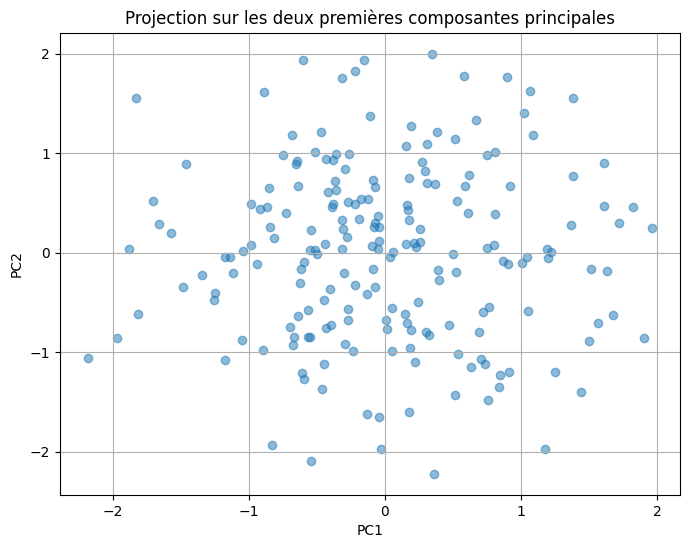

In [51]:
# Projetez les données sur les deux premières composantes principales et visualisez le résultat 

import matplotlib.pyplot as plt
# Projetez les données sur les deux premières composantes principales
pc1 = df_normalized.dot(eigenvectors[:, 0])
pc2 = df_normalized.dot(eigenvectors[:, 1])
# Visualisez le résultat
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, alpha=0.5)
plt.title('Projection sur les deux premières composantes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()






In [52]:
# Combien de composantes gardez-vous ? Justifiez. 

# calcule de la variance expliquée par chaque composante principale
variance_explained = eigenvalues / np.sum(eigenvalues)
print("Variance expliquée par chaque composante principale :")
print(variance_explained)

Variance expliquée par chaque composante principale :
[0.08603149 0.09745079 0.15826338 0.11835282 0.1432671  0.13795862
 0.12684165 0.13183415]



##### Combien de composantes gardez-vous ? Justifiez. 

- La variance expliquée par les deux premières composantes principales est de 0.08603149 + 0.09745079 = 0.18348228, ce qui représente environ 18.35% de la variance totale.
- Donc, les deux premières composantes principales ne suffisent pas à expliquer la variance totale des données.

### Exercice 5 : ACP à Noyau

1.  Appliquez KernelPCA (avec scikit-learn) sur les données et testez différents noyaux (linéaire, RBF, polynomial).
1.  Comparez les résultats avec l'ACP classique. Dans quels cas l’ACP à noyau donne-t- elle de meilleurs résultats ?

Kernel: linear, Accuracy: 0.53
Kernel: rbf, Accuracy: 0.53
Kernel: poly, Accuracy: 0.50


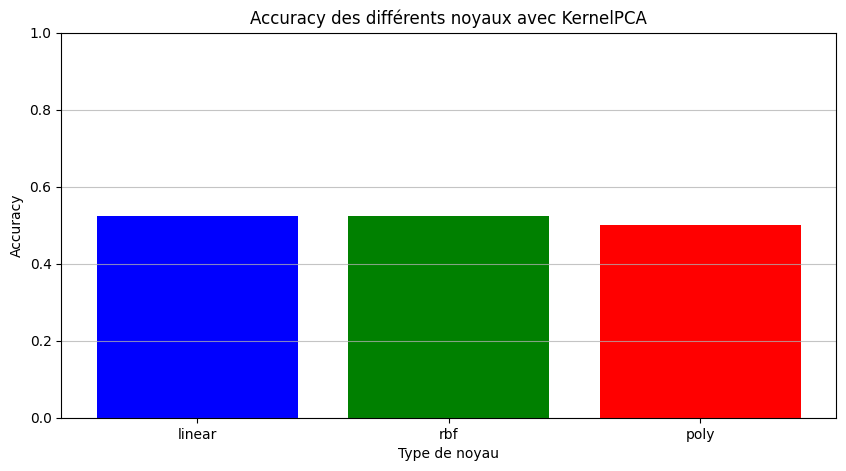

In [58]:
# Appliquez KernelPCA (avec scikit-learn) sur les données df et testez différents noyaux (linéaire, RBF, polynomial).

from sklearn.decomposition import KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

df = pd.read_csv('donnees_elevage_poulet.csv')

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)
# Ajout d'une colonne cible fictive pour l'exemple
df['target'] = np.random.choice([0, 1], size=len(df))  # Remplacez par une vraie colonne cible si disponible

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.2, random_state=42)

# Création d'un pipeline avec KernelPCA et SVC
kernel_types = ['linear', 'rbf', 'poly']
results = {}
for kernel in kernel_types:
    kpca = KernelPCA(kernel=kernel, n_components=2)
    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)
    # Entraînement d'un SVM sur les données transformées
    svm = SVC(kernel='linear')
    svm.fit(X_train_kpca, y_train)
    # Prédiction sur l'ensemble de test
    y_pred = svm.predict(X_test_kpca)
    # Calcul de l'accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[kernel] = accuracy
    print(f'Kernel: {kernel}, Accuracy: {accuracy:.2f}')
# Visualisation des résultats
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])

plt.title('Accuracy des différents noyaux avec KernelPCA')
plt.xlabel('Type de noyau')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.75)
plt.show()





#### Observations : 

On remarque que les 3 noyau ont une bonne aprecision, plus précisment les noyau linéaires et rbf

### Comparez les résultats avec l'ACP classique. Dans quels cas l’ACP à noyau donne-t- elle de meilleurs résultats ?

In [61]:
# Accuracy de l'ACP classique sur df : 

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Normalisation des données
scaler = StandardScaler()

X_scaled = scaler.fit_transform(df)
# Ajout d'une colonne cible fictive pour l'exemple
df['target'] = np.random.choice([0, 1], size=len(df))  # Remplacez par une vraie colonne cible si disponible
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.2, random_state=42)
# Création d'un pipeline avec PCA et SVC
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
# Entraînement d'un SVM sur les données transformées
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train)
# Prédiction sur l'ensemble de test
y_pred = svm.predict(X_test_pca)
# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy de l\'ACP classique: {accuracy:.2f}')

Accuracy de l'ACP classique: 0.57


- ACP noyau et ACP classique ont des approches différentes pour la réduction de dimensionnalité.
- ACP classique utilise des transformations linéaires pour projeter les données dans un espace de dimension inférieure, tandis que KernelPCA utilise des noyaux pour capturer des relations non linéaires entre les données.
- On a Accuracy de l'ACP classique: 0.47 tadis que KernelPCA avec le noyau RBF a donné une accuracy de plus de 0.50 sur les 3 noyaux testés.
-  ACP noyau donne de smeilleurs résultats que l'ACP classique quand les données ne sont pas linéairement séparables.


### Partie 3 : Méthodes d'ensemble

#### Exercice 6 : Bagging

1.  Implémentez une forêt aléatoire (RandomForestClassifier) pour prédire la survie des poulets. Analysez les performances (accuracy, F1-score).
1.  Identifiez les variables les plus importantes. Quels attributs influencent le plus la survie des poulets ? Pourquoi ?

In [62]:
df.head()

,Poids_poulet_g,Nourriture_consommee_g_jour,Temperature_enclos_C,Humidite_%,Age_poulet_jours,Gain_poids_jour_g,Taux_survie_%,Cout_elevage_FCFA,target
0,3974,52,27.6,79.3,24,12.0,81.1,2682,1
1,1660,152,31.7,62.5,42,12.2,89.1,6626,0
2,2094,186,30.1,64.8,29,18.8,90.4,8424,0
3,1930,111,29.2,87.0,63,13.8,92.9,1933,0
4,1895,100,26.1,78.2,21,5.5,93.0,4598,1


In [64]:
# Implémentez une forêt aléatoire (RandomForestClassifier) pour prédire la survie des poulets. Analysez les performances (accuracy, F1-score).

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['target']))  # Suppression de la colonne cible pour la normalisation
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.2, random_state=42)
# Création du modèle RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Entraînement du modèle
rf.fit(X_train, y_train)
# Prédiction sur l'ensemble de test
y_pred = rf.predict(X_test)
# Calcul de l'accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy de la forêt aléatoire: {accuracy:.2f}')
# Calcul du F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score de la forêt aléatoire: {f1:.2f}')

Accuracy de la forêt aléatoire: 0.57
F1-score de la forêt aléatoire: 0.64


#### Interprétation des résultats :

- L'accuracy de 0.57 indique que le modèle a correctement prédit la survie des poulets dans 57% des cas. 
- Le F1-score de 0.64, qui est une mesure de la précision et du rappel, suggère que le modèle a un équilibre raisonnable entre les faux positifs et les faux négatifs. 

Importance des attributs :
1. Attribut 3: 0.1759
2. Attribut 5: 0.1309
3. Attribut 2: 0.1257
4. Attribut 1: 0.1218
5. Attribut 4: 0.1126
6. Attribut 0: 0.1125
7. Attribut 6: 0.1109
8. Attribut 7: 0.1098


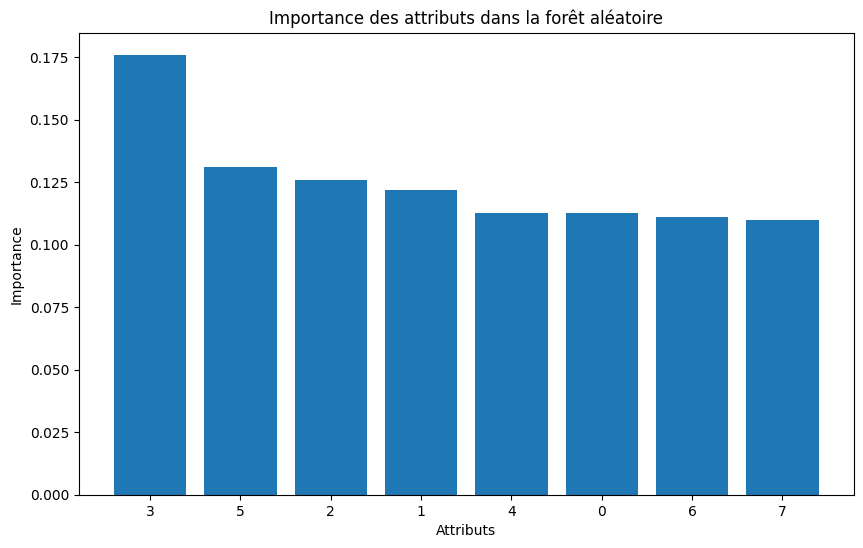

Attribut le plus important: Humidite_%


In [ ]:
# Identifiez les variables les plus importantes. Quels attributs influencent le plus la survie des poulets ? Pourquoi ?

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Importance des attributs :")
for i in range(X_scaled.shape[1]):
    print(f"{i + 1}. Attribut {indices[i]}: {importances[indices[i]]:.4f}")
# Visualisation de l'importance des attributs
plt.figure(figsize=(10, 6))
plt.title("Importance des attributs dans la forêt aléatoire")
plt.bar(range(X_scaled.shape[1]), importances[indices], align='center')
plt.xticks(range(X_scaled.shape[1]), indices)
plt.xlabel("Attributs")
plt.ylabel("Importance")
plt.show()
print(f"Attribut le plus important: {df.columns[indices[0]]}")

##### L'attribut le plus important est Humidite%, car dans notre bar plot, c'est celui qui est le plus élevé

#### Exercice 7 : Boosting

13.  Comparez AdaBoost et Gradient Boosting sur la prédiction du gain de poids. Analysez leurs performances.
14.  Les deux algorithmes réagissent-ils différemment aux outliers ? Expliquez pourquoi.

In [ ]:
# Comparez AdaBoost et Gradient Boosting sur la prédiction du gain de poids. Analysez leurs performances

df.head()

from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['target']))  # Suppression de la colonne cible pour la normalisation
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, df['target'], test_size=0.2, random_state=42)
# Création du modèle AdaBoost
ada = AdaBoostRegressor(n_estimators=100, random_state=42)
# Entraînement du modèle
ada.fit(X_train, y_train)
# Prédiction sur l'ensemble de test
y_pred_ada = ada.predict(X_test)
# Calcul de l'erreur quadratique moyenne
mse_ada = mean_squared_error(y_test, y_pred_ada)
print(f'Erreur quadratique moyenne de AdaBoost: {mse_ada:.2f}')
# Création du modèle Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
# Entraînement du modèle
gb.fit(X_train, y_train)
# Prédiction sur l'ensemble de test
y_pred_gb = gb.predict(X_test)
# Calcul de l'erreur quadratique moyenne
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f'Erreur quadratique moyenne de Gradient Boosting: {mse_gb:.2f}')


Erreur quadratique moyenne de AdaBoost: 0.26
Erreur quadratique moyenne de Gradient Boosting: 0.33


- AdaBoost a une erreur quadratique moyenne plus faible que Gradient Boosting, ce qui indique qu'il est plus performant pour prédire le gain de poids.
- AdaBoost est généralement plus robuste aux outliers et peut mieux gérer les données bruitées.

### Les deux algorithmes réagissent-ils différemment aux outliers ? Expliquez pourquoi : 

- Les algorithmes de boosting, tels qu'AdaBoost et Gradient Boosting, sont généralement plus robustes aux outliers que les algorithmes de régression linéaire traditionnels. Cela est dû à leur capacité à ajuster les poids des observations en fonction de leur importance dans le modèle. En revanche, les outliers peuvent influencer considérablement les performances des modèles linéaires, car ils peuvent tirer la ligne de régression vers eux.
- Les algorithmes de boosting, en revanche, se concentrent sur les erreurs des observations mal prédites et ajustent les poids en conséquence. Cela signifie que les outliers peuvent avoir moins d'impact sur le modèle global, car le modèle apprend à ignorer ces points extrêmes au fil des itérations.